In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset
file_path = r'/content/API_SI.POV.NAHC_DS2_en_excel_v2_10307.xls'
data = pd.read_excel(file_path, sheet_name=0)

In [6]:
# Data Cleaning: Drop rows where the 'Country Name' or the poverty headcount values are NaN
data = data.dropna(subset=['Country Name'])

# Convert the dataset to long format for easier plotting
data_long = pd.melt(data, id_vars=['Country Name'], var_name='Year', value_name='Poverty Headcount Ratio')

# Convert 'Year' to a numeric format and 'Poverty Headcount Ratio' to float
data_long['Year'] = pd.to_numeric(data_long['Year'], errors='coerce')
data_long['Poverty Headcount Ratio'] = pd.to_numeric(data_long['Poverty Headcount Ratio'], errors='coerce')

# Drop rows with NaN values after conversion
data_long = data_long.dropna()

In [8]:
# Function to create a histogram/bar chart
def plot_poverty_distribution(data):
    plt.figure(figsize=(10, 6))
    sns.histplot(data['Poverty Headcount Ratio'], bins=10, kde=True)
    plt.title('Distribution of Poverty Headcount Ratio')
    plt.xlabel('Poverty Headcount Ratio (%)')
    plt.ylabel('Frequency')
    plt.grid()
    plt.show()

In [36]:
# Function to create a line plot showing trends over the years
def plot_poverty_trends(data):
    plt.figure(figsize=(12, 6))
    for country in data['Country Name'].unique():
        country_data = data[data['Country Name'] == country]
        plt.plot(country_data['Year'], country_data['Poverty Headcount Ratio'], marker='o', label=country)

    plt.title('Poverty Headcount Ratio Trends Over the Years')
    plt.xlabel('Year')
    plt.ylabel('Poverty Headcount Ratio (%)')
    plt.xticks(rotation=45)
    plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid()
    plt.tight_layout()
    plt.show()

In [10]:
# Function to create a heatmap for correlation
def plot_correlation_heatmap(data):
    # Pivot the data to create a correlation matrix
    pivot_data = data.pivot(index='Country Name', columns='Year', values='Poverty Headcount Ratio')
    correlation_matrix = pivot_data.corr()

    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
    plt.title('Correlation Matrix of Poverty Headcount Ratios')
    plt.show()

***# Execute the plotting functions***

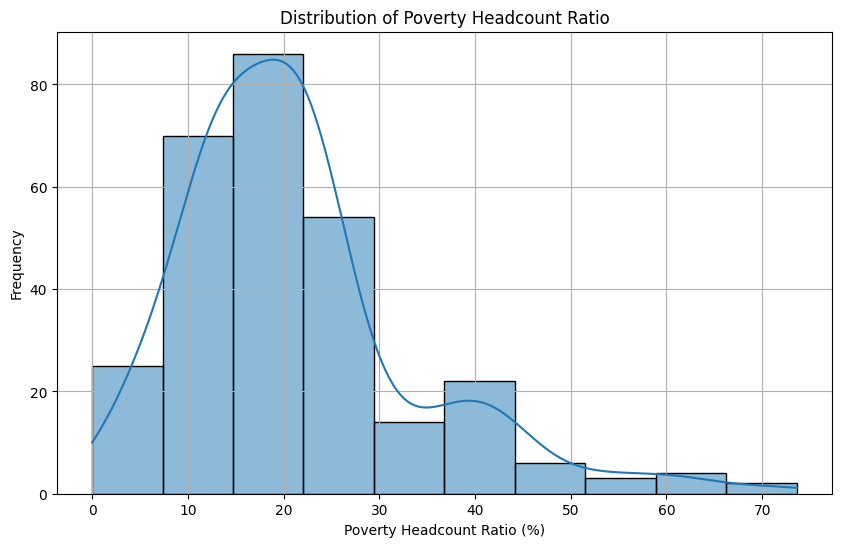

In [12]:
plot_poverty_distribution(data_long)

<ipython-input-36-a38c7803c430>:14: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


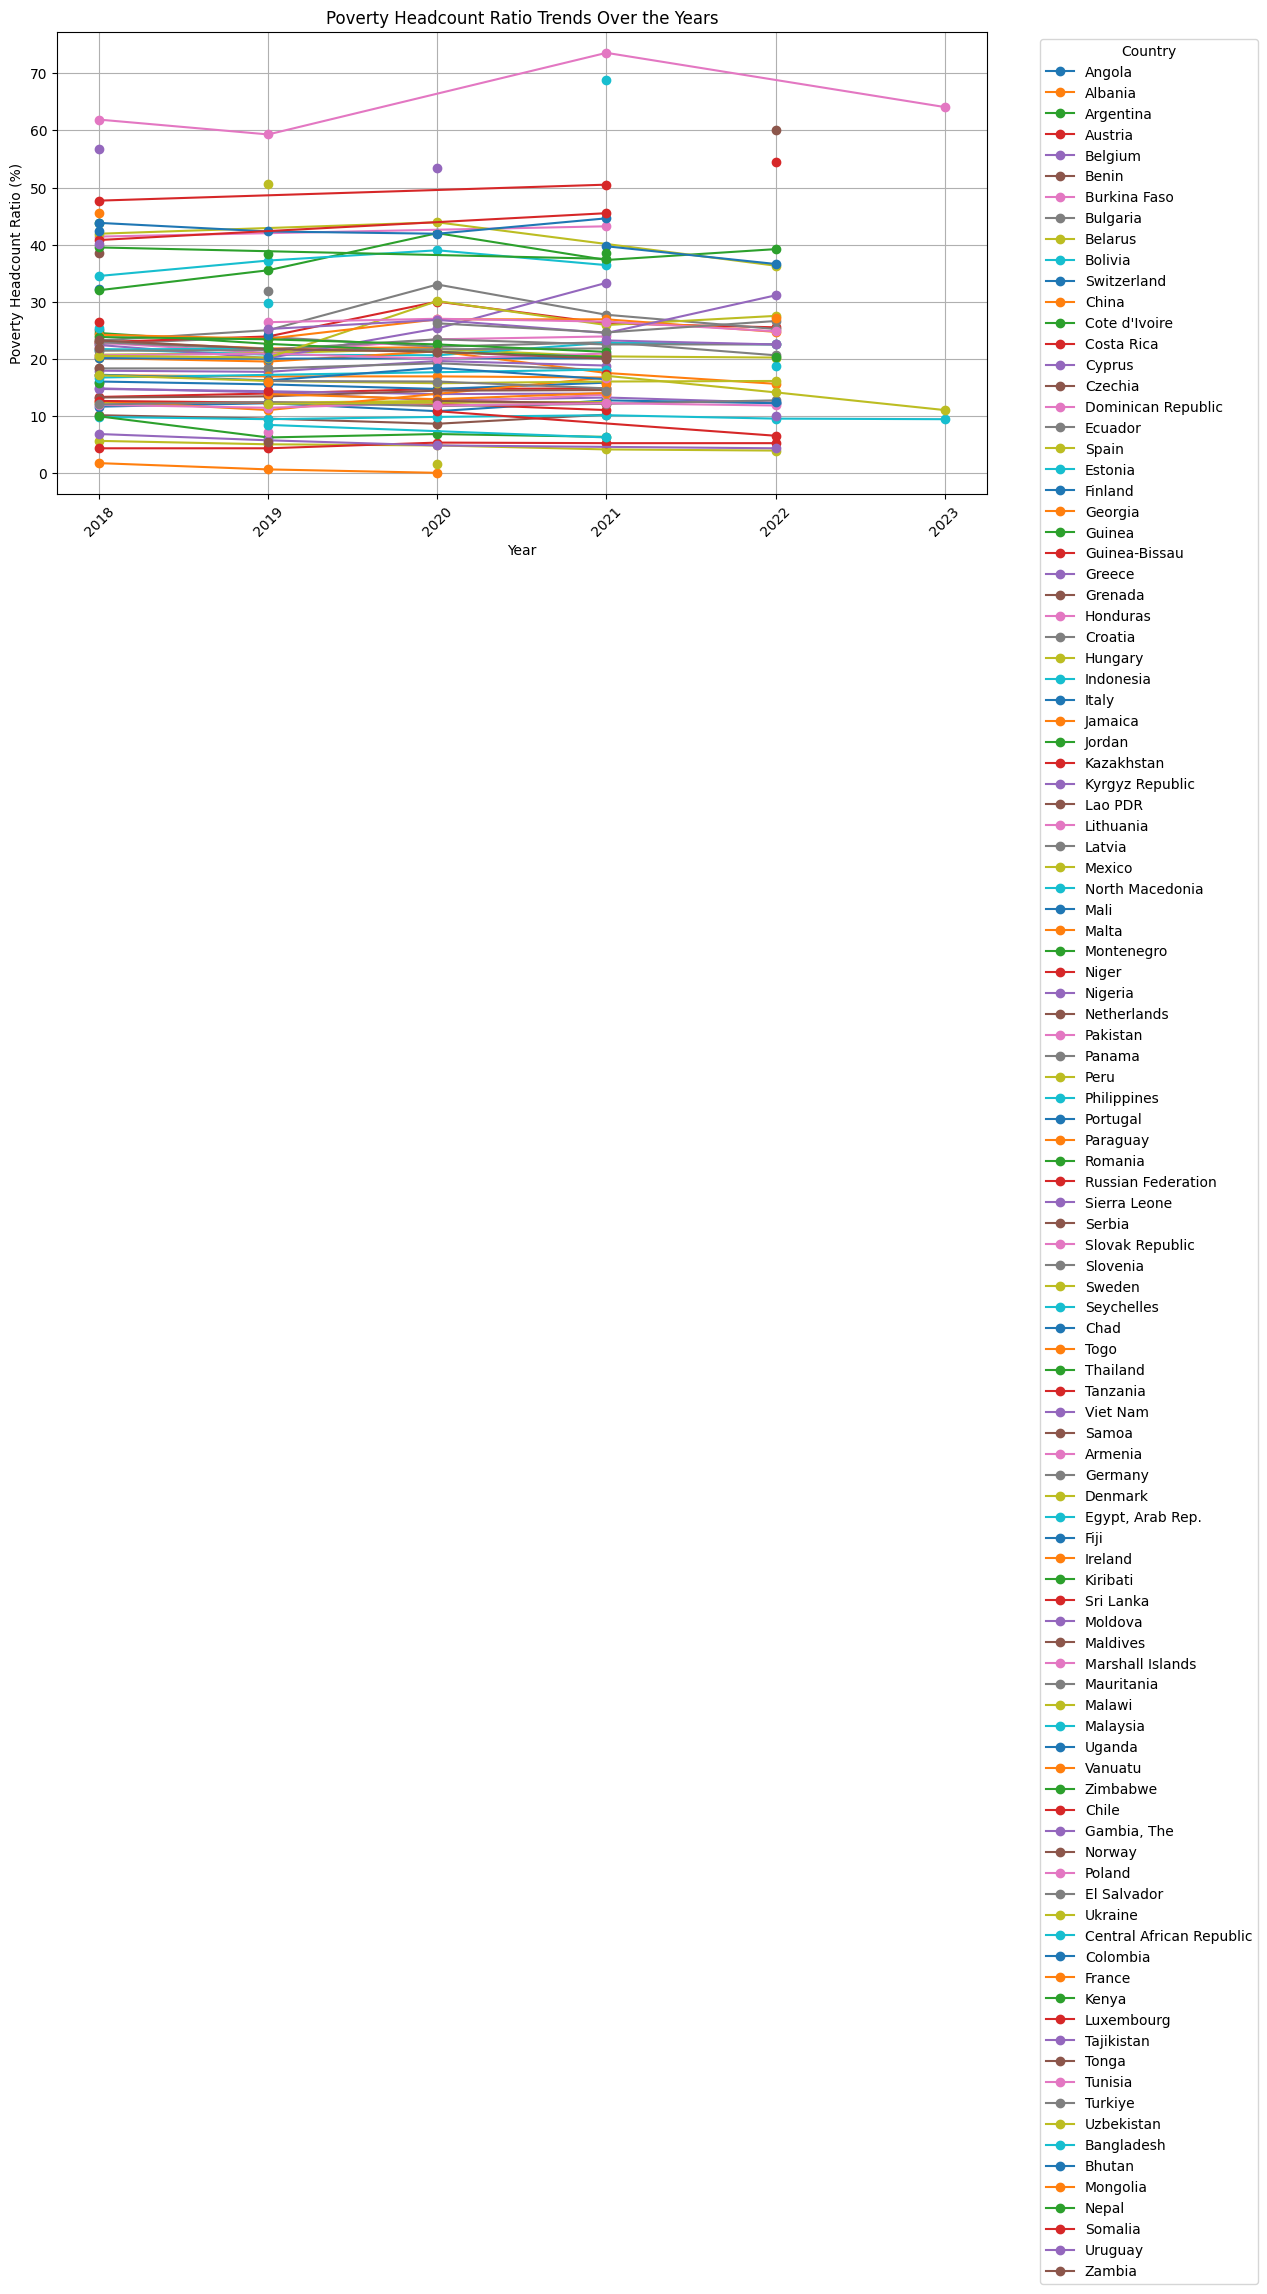

In [37]:
plot_poverty_trends(data_long)

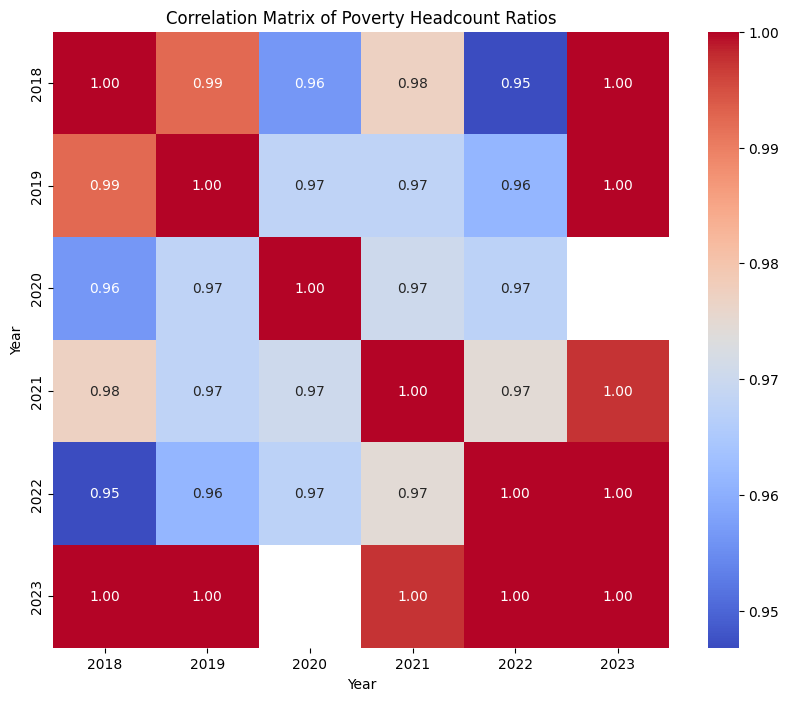

In [14]:
plot_correlation_heatmap(data_long)

In [16]:
# Statistical Analysis
statistics = data_long.describe()
# Select only numeric columns for correlation calculation
correlation = data_long.select_dtypes(include=['number']).corr()

In [17]:
# Print statistical summaries
print("Statistical Summary:\n", statistics)
print("Correlation Matrix:\n", correlation)

Statistical Summary:
               Year  Poverty Headcount Ratio
count   286.000000               286.000000
mean   2019.818182                21.356643
std       1.384812                12.392819
min    2018.000000                 0.000000
25%    2019.000000                12.700000
50%    2020.000000                20.100000
75%    2021.000000                24.950000
max    2023.000000                73.600000
Correlation Matrix:
                              Year  Poverty Headcount Ratio
Year                     1.000000                -0.006186
Poverty Headcount Ratio -0.006186                 1.000000
